In [46]:
import os
import boto3

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
s3 = boto3.client("s3")

filename = "HR_comma_sep.csv"
s3.download_file("sagemaker-ml-bucket-harini-2022", "training-data/HR_comma_sep.csv", filename)
df = pd.read_csv(filename)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]
y = df['left']

In [8]:
X.shape

(14999, 9)

In [9]:
y.shape

(14999,)

In [10]:
# If we predicted everyone will stay
y_left_pred = np.ones(y.shape)

In [11]:
y_left_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [14]:
# Benchmark Accuracy
print("The benchmark accuracy score is {:0.3f}".format(accuracy_score(y,y_left_pred)))

The benchmark accuracy score is 0.238


array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

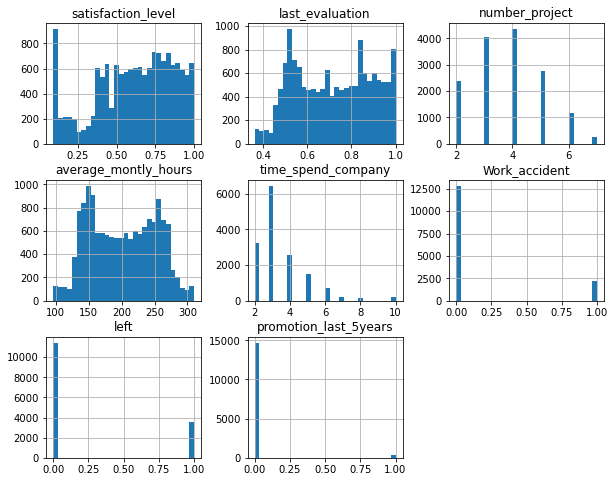

In [15]:
df.hist(bins=30, figsize=(10,8))

In [19]:
X_numeric = df[['satisfaction_level','last_evaluation','average_montly_hours']]

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_numeric ['satisfaction_level_ss'] = ss.fit_transform(X_numeric [['satisfaction_level']])
X_numeric ['last_evaluation_ss'] = ss.fit_transform(X_numeric [['last_evaluation']])
X_numeric ['average_montly_hours_ss'] = ss.fit_transform(X_numeric [['average_montly_hours']])


/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [21]:
X_numeric

,satisfaction_level,last_evaluation,average_montly_hours,satisfaction_level_ss,last_evaluation_ss,average_montly_hours_ss
0,0.38,0.53,157,-0.936495,-1.087275,-0.882040
1,0.80,0.86,262,0.752814,0.840707,1.220423
2,0.11,0.88,272,-2.022479,0.957554,1.420657
3,0.72,0.87,223,0.431041,0.899131,0.439508
4,0.37,0.52,159,-0.976716,-1.145699,-0.841993
...,...,...,...,...,...,...
14994,0.40,0.57,151,-0.856051,-0.853580,-1.002181
14995,0.37,0.48,160,-0.976716,-1.379394,-0.821970
14996,0.37,0.53,143,-0.976716,-1.087275,-1.162368
14997,0.11,0.96,280,-2.022479,1.424944,1.580845


In [24]:
X_catergorical = df[['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]

In [25]:
X_catergorical = pd.get_dummies(data=X_catergorical, columns=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary'])

In [30]:
X=pd.concat([X_numeric[['satisfaction_level_ss','last_evaluation_ss','average_montly_hours_ss']],X_catergorical],axis=1)
y=df['left']

In [31]:
X.shape

(14999, 34)

In [32]:
y.shape

(14999,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
# Logistic Regression

model = Sequential()
model.add(Dense(1, input_shape=(34,),activation='sigmoid'))
model.compile(Adam(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train)

Epoch 1/1
11999/11999 [==============================] - 1s 112us/step - loss: 0.3773 - accuracy: 0.8595


In [37]:
y_test_pred = (model.predict(X_test)>0.5).astype(int)

In [38]:
print("The accuracy score on Test set is {:0.3f}".format(accuracy_score(y_test,y_test_pred)))

The accuracy score on Test set is 0.857


In [43]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False","True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted'+ l for l in labels]
    df = pd.DataFrame(cm,index=labels, columns=pred_labels)
    return df

In [44]:
pretty_confusion_matrix(y_test,y_test_pred, ['Stay','Leave'])

,PredictedStay,PredictedLeave
Stay,2130,198
Leave,232,440


In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2328
           1       0.69      0.65      0.67       672

    accuracy                           0.86      3000
   macro avg       0.80      0.78      0.79      3000
weighted avg       0.85      0.86      0.86      3000



In [48]:
from keras.wrappers.scikit_learn import KerasClassifier

In [57]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(34,),activation='sigmoid'))
    model.compile(Adam(lr=0.5),'binary_crossentropy',metrics=['accuracy'])
    return model

In [58]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                       epochs=25)

In [59]:
from sklearn.model_selection import cross_val_score, KFold

In [60]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

Epoch 1/25
11999/11999 [==============================] - 2s 157us/step - loss: 0.3834 - accuracy: 0.8622
Epoch 2/25
11999/11999 [==============================] - 1s 77us/step - loss: 0.3809 - accuracy: 0.8675
Epoch 3/25
11999/11999 [==============================] - 1s 74us/step - loss: 0.3715 - accuracy: 0.8634
Epoch 4/25
11999/11999 [==============================] - 1s 77us/step - loss: 0.3663 - accuracy: 0.8642
Epoch 5/25
11999/11999 [==============================] - 1s 106us/step - loss: 0.3669 - accuracy: 0.8674
Epoch 6/25
11999/11999 [==============================] - 1s 84us/step - loss: 0.4134 - accuracy: 0.8575
Epoch 7/25
11999/11999 [==============================] - 1s 62us/step - loss: 0.3830 - accuracy: 0.8629
Epoch 8/25
11999/11999 [==============================] - 1s 61us/step - loss: 0.3721 - accuracy: 0.8646
Epoch 9/25
11999/11999 [==============================] - 1s 61us/step - loss: 0.3901 - accuracy: 0.8606
Epoch 10/25
11999/11999 [============================

In [61]:
scores

array([0.89733332, 0.87933332, 0.86833334, 0.85900003, 0.86362123])